In [1]:

import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

conn = sqlite3.connect("per.sqlite3")
cursor = conn.cursor()
print("დაკავშირებული ბაზასთან per.sqlite3\n")



დაკავშირებული ბაზასთან per.sqlite3



In [2]:

cursor.execute("SELECT * FROM personality WHERE Personality = 'Introvert'")
rows = cursor.fetchall()  # აბრუნებს ყველა ჩანაწერს შედეგებიდან
print("ინტროვერტების სია:\n")
for row in rows:
    print(row)



ინტროვერტების სია:

(9.0, 'Yes', 1.0, '2.0', 'Yes', 5.0, 2.0, 'Introvert')
(10.0, 'Yes', 1.0, '3.0', 'Yes', 0.0, 3.0, 'Introvert')
(9.0, 'Yes', 2.0, '2.0', 'Yes', 1.0, 0.0, 'Introvert')
(5.0, 'Yes', 3.0, '3.0', 'Yes', 0.0, 1.0, 'Introvert')
(8.0, 'Yes', 3.0, '3.0', None, 2.0, 0.0, 'Introvert')
(10.0, 'Yes', 1.0, '2.0', 'Yes', 2.0, 0.0, 'Introvert')
(9.0, 'Yes', 1.0, '3.0', 'Yes', 2.0, 2.0, 'Introvert')
(6.0, 'Yes', 2.0, '2.0', 'Yes', 2.0, 1.0, 'Introvert')
(10.0, 'Yes', 1.0, '2.0', 'Yes', 2.0, 0.0, 'Introvert')
(5.0, 'Yes', 1.0, '3.0', 'Yes', 3.0, 3.0, 'Introvert')
(9.0, 'Yes', 0.0, '2.0', 'Yes', 3.0, 2.0, 'Introvert')
(6.0, 'Yes', 3.0, '3.0', 'Yes', 4.0, 3.0, 'Introvert')
(9.0, 'Yes', 3.0, '2.0', 'Yes', 4.0, 3.0, 'Introvert')
(9.0, 'Yes', 2.0, '3.0', 'Yes', 4.0, 2.0, 'Introvert')
(5.0, 'Yes', 1.0, '3.0', 'Yes', 4.0, 3.0, 'Introvert')
(7.0, 'Yes', 3.0, '2.0', 'Yes', 1.0, 2.0, 'Introvert')
(8.0, 'Yes', 3.0, '3.0', 'Yes', 4.0, 0.0, 'Introvert')
(7.0, 'Yes', 3.0, '3.0', 'Yes', 2.0, 0.0, '

In [4]:

print("\nახალი ჩანაწერის დამატება:")
try:
    time_alone = float(input("მარტო ყოფნის დრო: "))
    stage_fear = input("აქვს სცენის შიში? (Yes/No): ")
    social_events = int(input("სოციალური ღონისძიებები: "))
    going_outside = int(input("გარეთ გასვლა: "))
    drained = input("იღლება სოციალიზაციის შემდეგ? (Yes/No): ")
    friends = int(input("მეგობრების რაოდენობა: "))
    posts = int(input("პოსტების სიხშირე: "))
    personality = input("პიროვნების ტიპი (Introvert/Extrovert): ")

    cursor.execute("""
        INSERT INTO personality (
            Time_spent_Alone, Stage_fear, Social_event_attendance, Going_outside,
            Drained_after_socializing, Friends_circle_size, Post_frequency, Personality
        )
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    """, (time_alone, stage_fear, social_events, going_outside,
          drained, friends, posts, personality))
    conn.commit()
    print("ჩანაწერი დაემატა.\n")
except Exception as e:
    print(f"დამატების შეცდომა: {e}\n")



ახალი ჩანაწერის დამატება:


მარტო ყოფნის დრო:  12
აქვს სცენის შიში? (Yes/No):  yes
სოციალური ღონისძიებები:  1
გარეთ გასვლა:  1
იღლება სოციალიზაციის შემდეგ? (Yes/No):  yes
მეგობრების რაოდენობა:  2
პოსტების სიხშირე:  0
პიროვნების ტიპი (Introvert/Extrovert):  introvert


ჩანაწერი დაემატა.



In [5]:

try:
    update_target = input("განახლების მიზანი – შეიყვანე პიროვნების ტიპი (Introvert/Extrovert): ")
    new_post_freq = int(input("ახალი პოსტის სიხშირე: "))

    cursor.execute("""
        UPDATE personality SET Post_frequency = ?
        WHERE Personality = ?
    """, (new_post_freq, update_target))
    conn.commit()
    print("განახლება წარმატებით შესრულდა.\n")
except Exception as e:
    print(f"განახლების შეცდომა: {e}\n")


განახლების მიზანი – შეიყვანე პიროვნების ტიპი (Introvert/Extrovert):  introvert
ახალი პოსტის სიხშირე:  2


განახლება წარმატებით შესრულდა.



In [6]:

try:
    threshold = int(input("წასაშლელად შეიყვანეთ მინ. რაოდენობა Going_outside ველში: "))
    cursor.execute("DELETE FROM personality WHERE Going_outside < ?", (threshold,))
    conn.commit()
    print("ჩანაწერები წაიშალა.\n")
except Exception as e:
    print(f"წაშლის შეცდომა: {e}\n")


წასაშლელად შეიყვანეთ მინ. რაოდენობა Going_outside ველში:  13


ჩანაწერები წაიშალა.



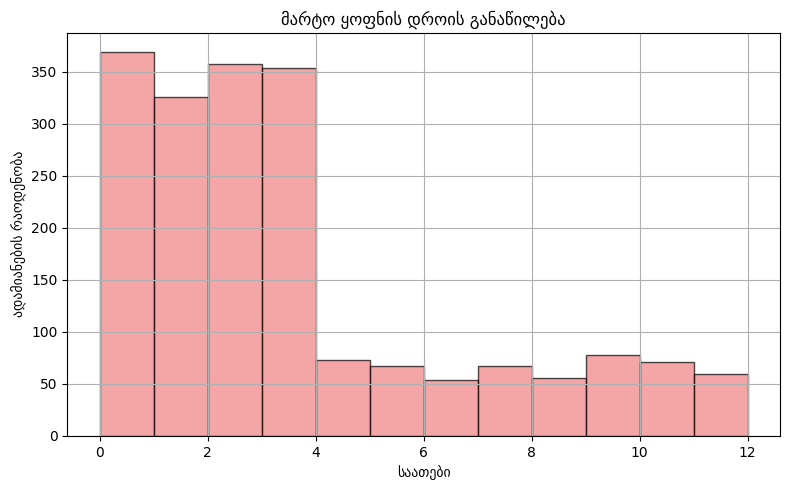

In [8]:
# : ჰისტოგრამა - მარტო ყოფნის დროის განაწილება
# ეს დიაგრამა აჩვენებს რამდენი ადამიანი რამდენ საათს ატარებს მარტო
cursor.execute("SELECT Time_spent_Alone FROM personality")
time_alone_data = [row[0] for row in cursor.fetchall() if row[0] is not None]

plt.figure(figsize=(8, 5))
plt.hist(time_alone_data, bins=12, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title("მარტო ყოფნის დროის განაწილება")
plt.xlabel("საათები")
plt.ylabel("ადამიანების რაოდენობა")
plt.grid(True)
plt.tight_layout()
plt.show()



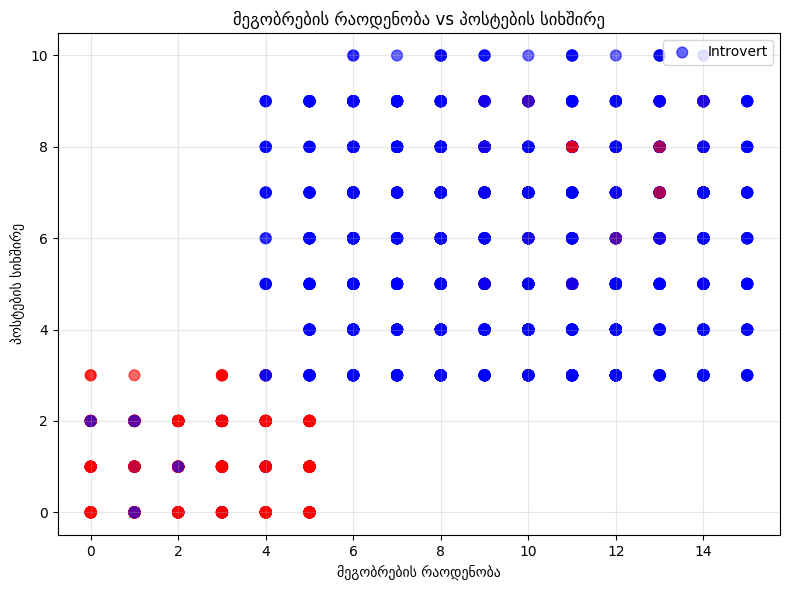

In [9]:
 # დიაგრამა 2: Scatter Plot - მეგობრების რაოდენობა vs პოსტების სიხშირე
# ეს დიაგრამა აჩვენებს კორელაციას მეგობრების რაოდენობასა და პოსტების სიხშირეს შორის
cursor.execute("SELECT Friends_circle_size, Post_frequency, Personality FROM personality")
scatter_data = cursor.fetchall()

friends_data = [row[0] for row in scatter_data]
posts_data = [row[1] for row in scatter_data]
colors = ['red' if row[2] == 'Introvert' else 'blue' for row in scatter_data]

plt.figure(figsize=(8,6))
plt.scatter(friends_data, posts_data, c=colors, alpha=0.6, s=60)
plt.title("მეგობრების რაოდენობა vs პოსტების სიხშირე")
plt.xlabel("მეგობრების რაოდენობა")
plt.ylabel("პოსტების სიხშირე")
plt.legend(['Introvert', 'Extrovert'], loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


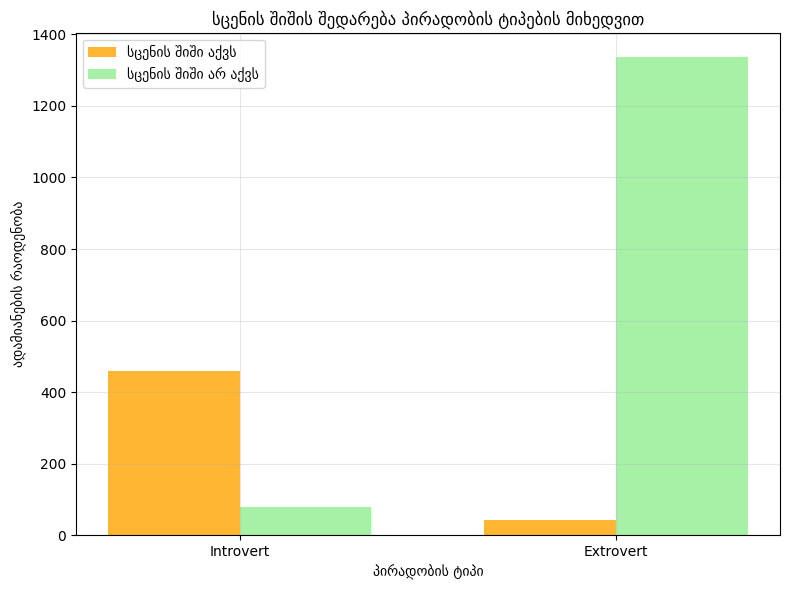

In [10]:
 # დიაგრამა 3: ზოლოვანი დიაგრამა - სცენის შიშის შედარება პირადობის მიხედვით
# ეს დიაგრამა აჩვენებს რამდენ ინტროვერტსა და ექსტროვერტს აქვს სცენის შიში
cursor.execute("SELECT Personality, Stage_fear FROM personality")
stage_data = cursor.fetchall()

intro_yes = sum(1 for row in stage_data if row[0] == 'Introvert' and row[1] == 'Yes')
intro_no = sum(1 for row in stage_data if row[0] == 'Introvert' and row[1] == 'No')
extro_yes = sum(1 for row in stage_data if row[0] == 'Extrovert' and row[1] == 'Yes')
extro_no = sum(1 for row in stage_data if row[0] == 'Extrovert' and row[1] == 'No')

personalities = ['Introvert', 'Extrovert']
yes_counts = [intro_yes, extro_yes]
no_counts = [intro_no, extro_no]

x = range(len(personalities))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar([i - width/2 for i in x], yes_counts, width, label='სცენის შიში აქვს', color='orange', alpha=0.8)
plt.bar([i + width/2 for i in x], no_counts, width, label='სცენის შიში არ აქვს', color='lightgreen', alpha=0.8)

plt.title("სცენის შიშის შედარება პირადობის ტიპების მიხედვით")
plt.xlabel("პირადობის ტიპი")
plt.ylabel("ადამიანების რაოდენობა")
plt.xticks(x, personalities)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:

conn.close()
print("კავშირი ბაზასთან დაიხურა.")

კავშირი ბაზასთან დაიხურა.
